In [1]:
#导入相关库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse
import warnings
warnings.filterwarnings("ignore")
import os


In [2]:
item_categories = pd.read_csv('flip0/item_categories.csv')
items = pd.read_csv('flip0/items.csv')
shop = pd.read_csv('flip0/shops.csv')
train = pd.read_csv('flip0/sales_train.csv')
test = pd.read_csv('flip0/test.csv')


In [24]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [7]:
print('how many lines in train set:', train.shape)
print('unique items in train set:', train['item_id'].nunique())
print('unique shops in train set:', train['shop_id'].nunique())
print('how many lines in test set:', test.shape)
print('unique items in test set:', test['item_id'].nunique())
print('unique shops in test set:', test['shop_id'].nunique())

('how many lines in train set:', (2935849, 6))
('unique items in train set:', 21807)
('unique shops in train set:', 60)
('how many lines in test set:', (214200, 3))
('unique items in test set:', 5100)
('unique shops in test set:', 42)


In [8]:
print('----------head---------')
print(train.head(5))
print('------information------')
print(train.info())
print('-----missing value-----')
print(train.isnull().sum())
print('--------nan value------')
print(train.isna().sum())

----------head---------
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
------information------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None
-----missing value-----
date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64
--------nan value----

('Sale volume outliers:', array([2169.]))
('Sale price outliers:', array([307980.]))


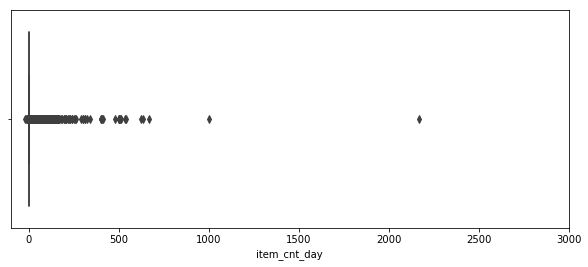

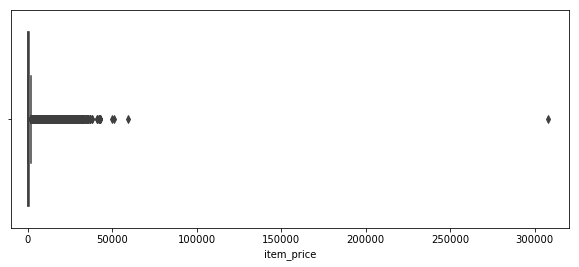

In [10]:
plt.figure(figsize=(10,4))
plt.xlim(-100,3000)
sns.boxplot(x = train['item_cnt_day'])
print('Sale volume outliers:',train['item_cnt_day'][train['item_cnt_day']>1001].unique())
plt.figure(figsize=(10,4))
plt.xlim(-10000,320000)
sns.boxplot(x = train['item_price'])
print('Sale price outliers:',train['item_price'][train['item_price']>300000].unique())

In [11]:
train = train[train['item_cnt_day']<1001]
train = train[(train.item_price>0) & (train.item_price<300000)]
train.shape

(2935846, 6)

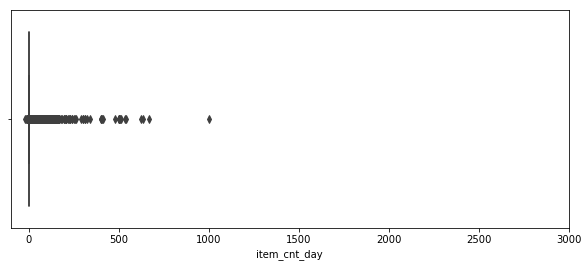

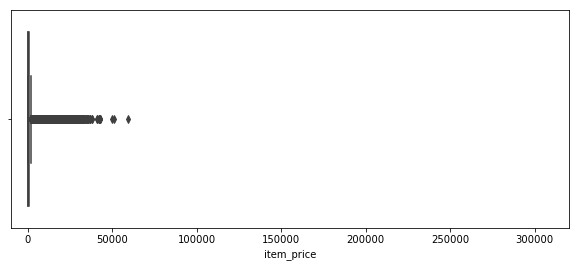

In [12]:
plt.figure(figsize=(10,4))
plt.xlim(-100,3000)
sns.boxplot(x = train['item_cnt_day'])
plt.figure(figsize=(10,4))
plt.xlim(-10000,320000)
sns.boxplot(x = train['item_price'])

In [13]:
train = train.drop_duplicates()
train.shape

(2935840, 6)

In [26]:
p_df = train.pivot_table(index=['shop_id','item_id'],columns='date_block_num',values='item_cnt_day',aggfunc='sum').fillna(0.0).reset_index()
p_df.tail()

date_block_num,shop_id,item_id,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
424119,59,22154,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424120,59,22155,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424121,59,22162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
424122,59,22164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
424123,59,22167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
train_cleaned_df = p_df.merge(items[['item_id','item_category_id']],how='inner')
train_cleaned_df.head()

,shop_id,item_id,0,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,32,33,item_category_id
0,0,30,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40
1,1,30,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40
2,2,30,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40
3,3,30,0.0,4.0,5.0,2.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,40
4,4,30,0.0,7.0,3.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40


In [16]:
test = test.merge(train_cleaned_df,how='left')
test = test.fillna(0.0)
test

,ID,shop_id,item_id,0,1,2,3,4,5,6,...,25,26,27,28,29,30,31,32,33,item_category_id
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0,19.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0,19.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,5,5039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,23.0
6,6,5,5041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,20.0
7,7,5,5046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,55.0
8,8,5,5319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,2.0,2.0,4.0,3.0,2.0,3.0,0.0,55.0
9,9,5,5003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
X_train = train_cleaned_df.iloc[:,(train_cleaned_df.columns != 33)].values
y_train = train_cleaned_df.iloc[:,train_cleaned_df.columns==33].values

X_test = test.iloc[:, (test.columns != 'ID') & (test.columns != 0)].values

In [18]:
X_test

array([[5.0000e+00, 5.0370e+03, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.9000e+01],
       [5.0000e+00, 5.3200e+03, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [5.0000e+00, 5.2330e+03, 0.0000e+00, ..., 3.0000e+00, 1.0000e+00,
        1.9000e+01],
       ...,
       [4.5000e+01, 1.5757e+04, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        5.5000e+01],
       [4.5000e+01, 1.9648e+04, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.5000e+01, 9.6900e+02, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        3.7000e+01]])

In [19]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from xgboost import XGBRegressor

xgbrfr = XGBRegressor()
xgbrfr.fit(X_train,y_train)

[12:27:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [20]:
y_pred = xgbrfr.predict(X_test)
y_pred = list(map(lambda x: min(20,max(x,0)), list(y_pred)))
sub_df = pd.DataFrame({'ID':test.ID,'item_cnt_month': y_pred })
sub_df.to_csv('predict sale_1.1.csv',index=False)

In [28]:
sales_by_item_id = train.pivot_table(index=['item_id'],values=['item_cnt_day'], 
                                        columns='date_block_num', aggfunc=np.sum, fill_value=0).reset_index()
sales_by_item_id.columns = sales_by_item_id.columns.droplevel().map(str)
sales_by_item_id = sales_by_item_id.reset_index(drop=True).rename_axis(None, axis=1)
sales_by_item_id.columns.values[0] = 'item_id'

In [29]:
sales_by_item_id.tail()

,item_id,0,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,32,33
21802,22165,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21803,22166,0,0,0,0,0,0,0,0,0,...,7,8,12,4,8,10,8,11,5,11
21804,22167,0,0,0,0,0,0,0,0,56,...,33,46,40,38,31,33,34,29,21,37
21805,22168,2,2,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
21806,22169,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


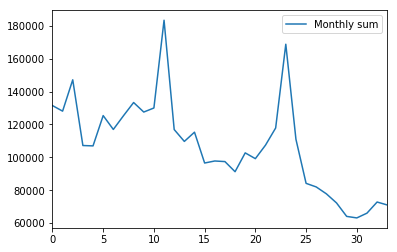

In [30]:
sales_by_item_id.sum()[1:].plot(legend=True, label="Monthly sum")

In [32]:
outdated_items = sales_by_item_id[sales_by_item_id.loc[:,'27':].sum(axis=1)==0]
print('Outdated items:', len(outdated_items))
print('unique items in test set:', test['item_id'].nunique())
print('Outdated items in test set:', test[test['item_id'].isin(outdated_items['item_id'])]['item_id'].nunique())

('Outdated items:', 12391)
('unique items in test set:', 5100)
('Outdated items in test set:', 164)


In [34]:
sales_by_shop_id = train.pivot_table(index=['shop_id'],values=['item_cnt_day'], 
                                        columns='date_block_num', aggfunc=np.sum, fill_value=0).reset_index()
sales_by_shop_id.columns = sales_by_shop_id.columns.droplevel().map(str)
sales_by_shop_id = sales_by_shop_id.reset_index(drop=True).rename_axis(None, axis=1)
sales_by_shop_id.columns.values[0] = 'shop_id'

for i in range(27,34):
    print('Not exists in month',i,sales_by_shop_id['shop_id'][sales_by_shop_id.loc[:,'0':str(i)].sum(axis=1)==0].unique())

for i in range(27,34):
    print('Shop is outdated for month',i,sales_by_shop_id['shop_id'][sales_by_shop_id.loc[:,str(i):].sum(axis=1)==0].unique())


('Not exists in month', 27, array([36], dtype=int64))
('Not exists in month', 28, array([36], dtype=int64))
('Not exists in month', 29, array([36], dtype=int64))
('Not exists in month', 30, array([36], dtype=int64))
('Not exists in month', 31, array([36], dtype=int64))
('Not exists in month', 32, array([36], dtype=int64))
('Not exists in month', 33, array([], dtype=int64))
('Shop is outdated for month', 27, array([ 0,  1,  8, 11, 13, 17, 23, 30, 32, 40, 43], dtype=int64))
('Shop is outdated for month', 28, array([ 0,  1,  8, 11, 13, 17, 23, 30, 32, 33, 40, 43, 54], dtype=int64))
('Shop is outdated for month', 29, array([ 0,  1,  8, 11, 13, 17, 23, 29, 30, 32, 33, 40, 43, 54],
      dtype=int64))
('Shop is outdated for month', 30, array([ 0,  1,  8, 11, 13, 17, 23, 29, 30, 32, 33, 40, 43, 54],
      dtype=int64))
('Shop is outdated for month', 31, array([ 0,  1,  8, 11, 13, 17, 23, 29, 30, 32, 33, 40, 43, 54],
      dtype=int64))
('Shop is outdated for month', 32, array([ 0,  1,  8, 11,

In [10]:
train = train[(train['item_cnt_day'] < 400) & (train['item_price'] < 45000)].copy()
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [11]:
(train[['date_block_num', 'shop_id','item_id', 'item_price']] < 0).any()

date_block_num    False
shop_id           False
item_id           False
item_price         True
dtype: bool

In [12]:
train[filtered['item_price'] <= 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [13]:
train.groupby(['date_block_num','shop_id', 'item_id'])['item_price'].mean().loc[4, 32, 2973]

1249.0

In [14]:
train.loc[filtered['item_price'] <= 0, 'item_price'] = 1249.0  # 用了同一个月同一个商店该商品的均价
train[filtered['item_price'] <= 0]  

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,1249.0,1.0


In [20]:
shop_sales_monthly = train.pivot_table(index='date_block_num',
                                          columns='shop_id',
                                          values='item_cnt_day',
                                          fill_value=0,
                                          aggfunc=sum)
shop_open_month_cnt = (shop_sales_monthly.iloc[-6:] >  0).sum()  # 有销量的记录
shop_open_month_cnt

shop_id
0     0
1     0
2     6
3     6
4     6
5     6
6     6
7     6
8     0
9     1
10    6
11    0
12    6
13    0
14    6
15    6
16    6
17    0
18    6
19    6
20    1
21    6
22    6
23    0
24    6
25    6
26    6
27    3
28    6
29    1
30    0
31    6
32    0
33    0
34    6
35    6
36    1
37    6
38    6
39    6
40    0
41    6
42    6
43    0
44    6
45    6
46    6
47    6
48    6
49    6
50    6
51    5
52    6
53    6
54    0
55    6
56    6
57    6
58    6
59    6
dtype: int64

In [21]:
[shop_open_month_cnt[shop_open_month_cnt < 6].index]

[Int64Index([0, 1, 8, 9, 11, 13, 17, 20, 23, 27, 29, 30, 32, 33, 36, 40, 43, 51,
             54],
            dtype='int64', name=u'shop_id')]

In [16]:
shop_c_n = shop_sales_monthly[shop_open_month_cnt[shop_open_month_cnt < 6].index]
shop_c_n.tail(12)

shop_id,0,1,8,9,11,13,17,20,23,27,29,30,32,33,36,40,43,51,54
date_block_num,,,,,,,,,,,,,,,,,,,
22,0,0,0,0,0,0,1199,0,0,4675,1926,2044,0,814,0,515,2659,1090,6389
23,0,0,0,0,0,0,1832,0,0,7896,2402,2700,0,1056,0,1024,3139,1652,7677
24,0,0,0,0,0,0,689,0,0,5660,1564,1842,0,1006,0,443,1340,976,6043
25,0,0,0,0,572,0,0,0,0,3839,1273,745,0,792,0,0,0,660,4221
26,0,0,0,0,0,0,0,0,0,3634,1239,0,0,505,0,0,0,545,4625
27,0,0,0,-1,0,0,0,0,0,3518,1216,0,0,-1,0,0,0,494,732
28,0,0,0,0,0,0,0,0,0,3786,880,0,0,0,0,0,0,758,0
29,0,0,0,0,0,0,0,0,0,3357,0,0,0,0,0,0,0,659,0
30,0,0,0,0,0,0,0,0,0,2478,0,0,0,0,0,0,0,748,0


NameError: name 'top_sales' is not defined

In [23]:
item_sales_monthly = train.pivot_table(columns='item_id',
                                          index='date_block_num', 
                                          values='item_cnt_day',
                                          fill_value=0,
                                          aggfunc=sum)
item_sales_monthly.head()

item_id,0,1,2,3,4,5,6,7,8,9,...,22160,22161,22162,22163,22164,22165,22166,22167,22168,22169
date_block_num,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,11,0,0,0,0,0,0,0,2,0
1,0,0,0,0,0,0,0,0,0,0,...,7,0,0,0,0,0,0,0,2,0
2,0,0,0,0,0,0,0,0,0,0,...,6,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,6,1,0,0,0,0,0,0,0,0


In [24]:
item_selling_month_cnt = (item_sales_monthly.iloc[-6:] >  0).sum() 
item_selling_month_cnt.head() 

item_id
0    0
1    0
2    0
3    0
4    0
dtype: int64

In [25]:
item_zero = item_sales_monthly[item_selling_month_cnt[item_selling_month_cnt == 0].index]
# 这些商品在最后半年都没有销量
item_zero.tail(12)

item_id,0,1,2,3,4,5,6,7,8,9,...,22150,22151,22152,22156,22157,22160,22161,22165,22168,22169
date_block_num,,,,,,,,,,,,,,,,,,,,,
22,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
selling_item = item_sales_monthly[item_selling_month_cnt[item_selling_month_cnt > 0].index]
selling_item.tail(12) 

item_id,30,31,32,33,38,39,40,42,45,49,...,22153,22154,22155,22158,22159,22162,22163,22164,22166,22167
date_block_num,,,,,,,,,,,,,,,,,,,,,
22,13,11,29,20,10,0,1,3,8,3,...,0,0,0,0,0,0,0,0,16,49
23,16,18,40,21,11,0,5,2,10,2,...,1,0,0,0,0,0,0,0,11,40
24,14,25,42,19,7,0,1,2,11,2,...,0,0,0,0,0,0,0,0,7,33
25,14,13,32,26,4,1,1,1,2,4,...,1,0,0,0,0,311,0,289,8,46
26,5,12,40,20,1,0,0,2,3,2,...,0,0,0,0,0,194,0,92,12,40
27,4,13,20,13,0,0,1,1,5,5,...,0,0,0,0,0,78,0,27,4,38
28,5,5,20,12,3,0,0,2,2,2,...,0,0,0,0,12,35,0,23,8,31
29,4,10,26,11,2,0,0,1,1,3,...,0,0,1,0,3,22,0,6,10,33
30,4,6,21,15,5,0,0,1,3,4,...,0,8,0,0,0,27,0,12,8,34


In [27]:
open_shop = shop_sales_monthly[shop_open_month_cnt[shop_open_month_cnt == 6].index]
open_shop.tail(7)

shop_id,2,3,4,5,6,7,10,12,14,15,...,48,49,50,52,53,55,56,57,58,59
date_block_num,,,,,,,,,,,,,,,,,,,,,
27,859,740,899,1054,1998,1340,594,2620,1055,1364,...,1081,542,895,1152,1322,3422,1237,2860,1710,1054
28,843,731,893,1012,1748,1217,466,2930,933,1277,...,1110,692,1073,894,1206,2117,1315,2408,1378,916
29,804,672,793,954,1539,1235,441,1830,1019,1332,...,990,789,900,820,1078,1909,1566,2440,1554,913
30,785,535,842,991,1484,1327,449,1554,954,1316,...,1102,856,1126,828,1257,1658,1491,2352,1689,992
31,942,666,947,1294,1575,1409,442,1471,1061,1360,...,1308,966,1081,932,1318,1976,1604,2780,1738,1214
32,822,745,732,1092,1725,1287,519,4042,1094,1267,...,1101,567,906,1086,1229,5697,1194,2266,1319,914
33,727,613,831,1052,1802,1212,428,1512,1002,1243,...,1111,648,949,847,1061,1972,1263,2316,1446,790


In [28]:
cl_set = train[filtered['shop_id'].isin(open_shop.columns) & filtered['item_id'].isin(selling_item.columns)]
cl_set

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0
2,05.01.2013,0,25,2552,899.0,-1.0
10,03.01.2013,0,25,2574,399.0,2.0
11,05.01.2013,0,25,2574,399.0,1.0
12,07.01.2013,0,25,2574,399.0,1.0
13,08.01.2013,0,25,2574,399.0,2.0
14,10.01.2013,0,25,2574,399.0,1.0
15,11.01.2013,0,25,2574,399.0,2.0
16,13.01.2013,0,25,2574,399.0,1.0


In [56]:
p_df = cl_set.pivot_table(index=['shop_id','item_id'],columns='date_block_num',values='item_cnt_day',aggfunc='sum').fillna(0.0).reset_index()


In [57]:
train_cleaned_df = p_df.merge(items[['item_id','item_category_id']],how='inner')
train_cleaned_df[:3]

,shop_id,item_id,0,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,32,33,item_category_id
0,2,30,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40
1,3,30,0.0,4.0,5.0,2.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,40
2,4,30,0.0,7.0,3.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40


In [58]:
test = test.merge(train_cleaned_df,how='left')
test = test.fillna(0.0)
test

,ID,shop_id,item_id,0,1,2,3,4,5,6,...,25,26,27,28,29,30,31,32,33,item_category_id
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0,19.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0,19.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,5,5039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,23.0
6,6,5,5041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,20.0
7,7,5,5046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,55.0
8,8,5,5319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,2.0,2.0,4.0,3.0,2.0,3.0,0.0,55.0
9,9,5,5003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
X_train = train_cleaned_df.iloc[:,(train_cleaned_df.columns != 33)].values
y_train = train_cleaned_df.iloc[:,train_cleaned_df.columns==33].values
X_test = test.iloc[:, (test.columns != 'ID') & (test.columns != 0)].values
xgbrfr = XGBRegressor()
xgbrfr.fit(X_train,y_train)
y_pred = xgbrfr.predict(X_test)
y_pred = list(map(lambda x: min(20,max(x,0)), list(y_pred)))
sub_df = pd.DataFrame({'ID':test.ID,'shop_id':test.shop_id,'item_id':test.item_id,'item_cnt_month': y_pred })

In [60]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from xgboost import XGBRegressor

xgbrfr = XGBRegressor()
xgbrfr.fit(X_train,y_train)

[13:14:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [68]:
y_pred = xgbrfr.predict(X_test)
y_pred = list(map(lambda x: min(20,max(x,0)), list(y_pred)))
sub_df = pd.DataFrame({'ID':test.ID,'shop_id':test.shop_id,'item_id':test.item_id,'item_cnt_month': y_pred })
sub_df

,ID,item_cnt_month,item_id,shop_id
0,0,0.389207,5037,5
1,1,0.174376,5320,5
2,2,0.624552,5233,5
3,3,0.196930,5232,5
4,4,0.174376,5268,5
5,5,0.318826,5039,5
6,6,1.023503,5041,5
7,7,0.146150,5046,5
8,8,0.808225,5319,5
9,9,0.174376,5003,5


In [69]:
sub_df[sub_df.shop_id.isin(shop_c_n.columns)]['shop_id'].unique()
sub_df.loc[sub_df.item_id.isin(item_zero), 'item_cnt_month'] = 0
sub_df[['ID','item_cnt_month']].to_csv('fromfinal02.csv',sep=',',index=False)

array([36], dtype=int64)

In [72]:
sub_df.loc[sub_df.item_id.isin(item_zero), 'item_cnt_month'] = 0
sub_df.loc[sub_df.item_id.isin(item_zero), 'item_cnt_month']

298       0.0
493       0.0
817       0.0
953       0.0
1165      0.0
1174      0.0
1175      0.0
1176      0.0
1194      0.0
1274      0.0
1340      0.0
1341      0.0
1346      0.0
1515      0.0
1554      0.0
1572      0.0
1685      0.0
1699      0.0
1740      0.0
1915      0.0
1926      0.0
2104      0.0
2261      0.0
2312      0.0
2354      0.0
2373      0.0
2432      0.0
2444      0.0
2509      0.0
2583      0.0
         ... 
213789    0.0
213803    0.0
213824    0.0
213866    0.0
213900    0.0
213938    0.0
213946    0.0
213947    0.0
213948    0.0
213955    0.0
213972    0.0
213996    0.0
214018    0.0
214025    0.0
214038    0.0
214053    0.0
214093    0.0
214098    0.0
214100    0.0
214113    0.0
214114    0.0
214116    0.0
214122    0.0
214139    0.0
214164    0.0
214165    0.0
214167    0.0
214176    0.0
214179    0.0
214180    0.0
Name: item_cnt_month, Length: 7812, dtype: float64

In [73]:
sub_df[['ID','item_cnt_month']].to_csv('fromfinal02.csv',sep=',',index=False)

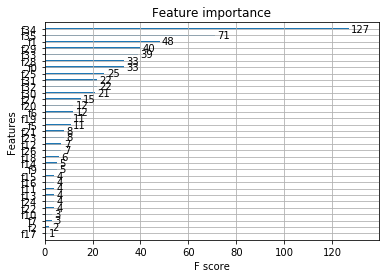

In [75]:
from xgboost import plot_importance
plot_importance(xgbrfr)
plt.show()